
# Ch02.12. 실전-한국 부동산 데이터 시각화 경진대회



*   **날짜 : 2022.05.03**
*   **이름 : 윤태우**






In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')

In [2]:
# # 한글 폰트 경로 파악

# for f in fm.fontManager.ttflist:
#     if 'NanumGothic' == f.name:
#         print(f'Font: {f.name}, Path: {f.fname}')

In [3]:
# # 한글 폰트 설정

# font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
# mpl.rc('font',family='NanumGothic')
# print(mpl.rcParams['font.family'])

# # 기본 구조 설정
# sns.set(font_scale=1.2, style='white', palette='tab20') 

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [5]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [6]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [54]:
df_path1 = '/content/gdrive/MyDrive/딥러닝 프레임워크 실무/SkillTreePython-DataAnalysis-main/data/235724_한국 부동산 데이터 시각화 경진대회_data/미분양주택현황.csv'
df_path2 = '/content/gdrive/MyDrive/딥러닝 프레임워크 실무/SkillTreePython-DataAnalysis-main/data/235724_한국 부동산 데이터 시각화 경진대회_data/주택건설인허가실적.csv'
df_path3 = '/content/gdrive/MyDrive/딥러닝 프레임워크 실무/SkillTreePython-DataAnalysis-main/data/235724_한국 부동산 데이터 시각화 경진대회_data/지역별_지가변동률.csv'

In [55]:
df1 = pd.read_csv(df_path1)   # df1 = 미분양 주택 현황
df2 = pd.read_csv(df_path2)   # df2 = 주택매매가격지수
df3 = pd.read_csv(df_path3)   # df3 = 지역별 지가변동률

In [56]:
# unnamed 컬럼명 날짜로 변경, 다른 컬럼명도 간단하게 변경
df1.columns = ['연도','전국', '서울', '부산', '대구', '인천', '광주', '대전', '울산', '경기', '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주', '수도권', '세종']

# 필요 없는 컬럼 삭제
df2 = df2.drop(['민간부문[호]', '부문별[호]', '공공부문[호]'], axis =1 )

# 컬럼명 깔끔하게 정리
df2.columns = ['연도', '전국',	'부산',	'충북',	'충남',	'대구',	'대전',	'강원',	'광주',	'경기',	'인천',	'제주',	'전북',	'전남',	'경북',	'경남',	'세종',	'서울',	'울산']

# df1 (미분양 주택 현황)과 컬럼 순서 통일
df1 = df1.drop(['수도권'], axis = 1)
df2 = df2[['연도','전국', '서울', '부산', '대구', '인천', '광주', '대전', '울산', '경기', '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주', '세종']]

# df3 (지역별 지가 변동률)도 컬럼 명, 순서 통일
df3.columns = ['연도','전국', '서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주']
df3 = df3[['연도','전국', '서울', '부산', '대구', '인천', '광주', '대전', '울산', '경기', '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주', '세종']]


# 연도별 미분양 주택 수 합계 

for i in range(len(df1['연도'])) :
  df1['연도'][i] = df1['연도'][i][:4]

df1 = df1.groupby('연도').sum()


# 연도별 주택 건설 인허가 실적
for i in range(len(df2['연도'])) :
  df2['연도'][i] = df2['연도'][i][:4]

df2 = df2.groupby('연도').sum()

# 연도별 미분양 주택 수 합계 

for i in range(len(df3['연도'])) :
  df3['연도'][i] = df3['연도'][i][:4]

df3 = df3.groupby('연도').sum()


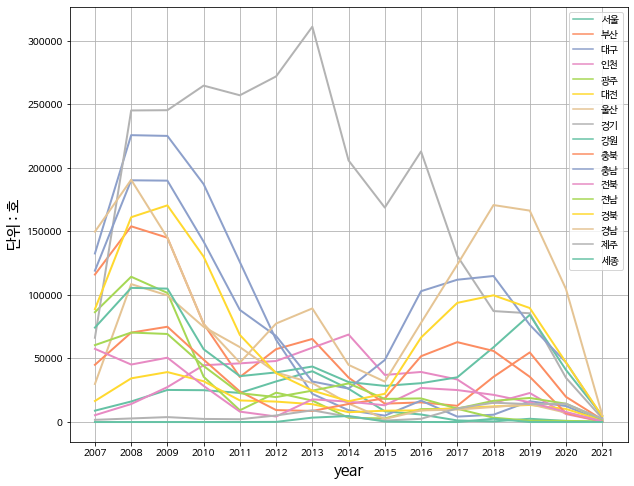

In [92]:
fig = plt.figure(figsize=(10,8)) 
sns.lineplot(data=df1.iloc[:,1:], palette="Set2", linewidth=2, dashes=False)
plt.ylabel('단위 : 호', size = 15)
plt.xlabel('year', size = 15)

plt.grid()
plt.show()

fig.savefig(f'미분양주택.jpg',
          format='jpeg',
          dpi=100,
          bbox_inches='tight')

원하는 연도 입력 (2007 ~ 2021): 2020


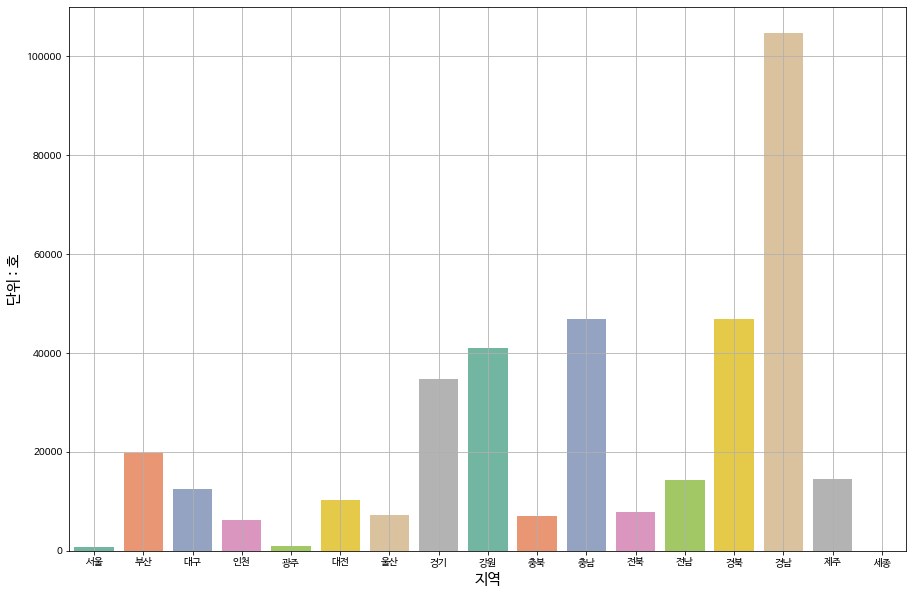

In [58]:
# 원하는 연도의 지역별 미분양 주택 현황

df = df1.T
fig = plt.figure(figsize=(15,10)) 

input_1 = input('원하는 연도 입력 (2007 ~ 2021): ')
sns.barplot(data=df, x = df.index[1:], y = df[input_1][1:], palette="Set2", linewidth=2)
plt.ylabel('단위 : 호', size = 15)
plt.xlabel('지역', size = 15)

plt.grid()
plt.show()

원하는 연도 입력 (2007 ~ 2021): 2015


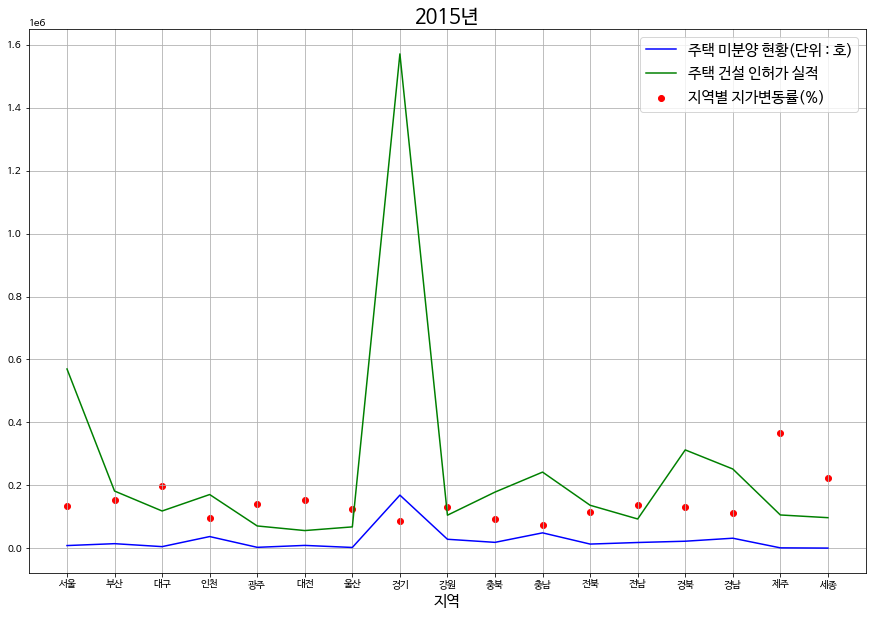

In [105]:
# 주택 건설 인허가 실적과 미분양 주택 현황

df_1 = df1.T
df_2 = df2.T
df_3 = df3.T
fig = plt.figure(figsize=(15,10)) 

input_1 = input('원하는 연도 입력 (2007 ~ 2021): ')
plt.plot(df_1[input_1][1:], label = '주택 미분양 현황(단위 : 호)', color = 'blue')
plt.xlabel('지역', size = 15)

plt.plot(df_2[input_1][1:], label = '주택 건설 인허가 실적', color = 'green')

# 지가변동률은 %이기 때문에 구분 잘 되도록 값을 크게 만듦.
plt.scatter(df_3.index[1:], df_3[input_1][1:]*50000, label = '지역별 지가변동률(%)', color = 'r')
plt.legend(fontsize = 15)

plt.title(f'{input_1}년', fontsize=20)
plt.grid()
plt.show()

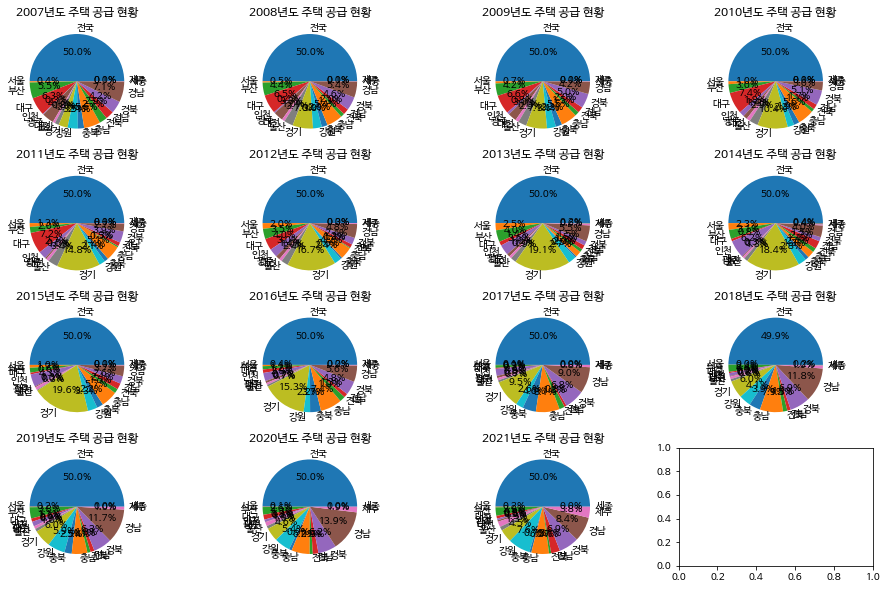

In [91]:
fig, axes = plt.subplots(4,4,figsize=(16,10))
axes = axes.flatten()
for y,ax in zip(range(2007,2022), axes):
  ax.set_title(f'{y}년도 주택 공급 현황')
  ax.pie(df_1.iloc[:,y-2007], labels=df_1.index, autopct='%.1f%%')

연도 입력 : 2020


Text(0.5, 1.0, '2020년도 지가변동률')

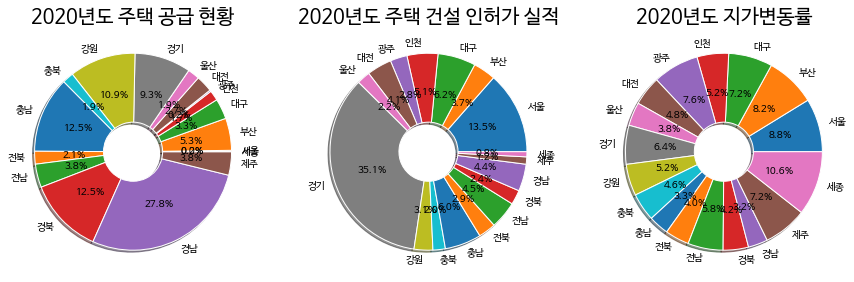

In [121]:
input_2 = input('연도 입력 : ')

plt.figure(figsize = (15,10))
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 1}

plt.subplot(1,3,1)
plt.pie(df_1.iloc[:,int(input_2)-2007][1:], labels=df_1.index[1:], autopct='%.1f%%', shadow = True, wedgeprops=wedgeprops)
plt.title(f'{input_2}년도 주택 공급 현황', fontsize = 20)

plt.subplot(1,3,2)
plt.pie(df_2.iloc[:,int(input_2)-2007][1:], labels=df_2.index[1:], autopct='%.1f%%', shadow = True, wedgeprops=wedgeprops)
plt.title(f'{input_2}년도 주택 건설 인허가 실적', fontsize = 20)

plt.subplot(1,3,3)
plt.pie(df_3.iloc[:,int(input_2)-2007][1:], labels=df_3.index[1:], autopct='%.1f%%', shadow = True, wedgeprops=wedgeprops)
plt.title(f'{input_2}년도 지가변동률', fontsize = 20)

In [ ]:
plt.pie(df_1, labels=, autopct='%.1f%%', startangle=260, counterclock=False)
plt.show()